In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset_comunidades_senasoft.csv")
df.head()

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1


In [3]:
df.columns


Index(['ID', 'Nombre', 'Edad', 'Género', 'Ciudad', 'Comentario',
       'Categoría del problema', 'Nivel de urgencia', 'Fecha del reporte',
       'Acceso a internet', 'Atención previa del gobierno', 'Zona rural'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10000 non-null  int64  
 1   Nombre                        10000 non-null  object 
 2   Edad                          9325 non-null   float64
 3   Género                        9539 non-null   object 
 4   Ciudad                        9864 non-null   object 
 5   Comentario                    9362 non-null   object 
 6   Categoría del problema        10000 non-null  object 
 7   Nivel de urgencia             10000 non-null  object 
 8   Fecha del reporte             10000 non-null  object 
 9   Acceso a internet             10000 non-null  int64  
 10  Atención previa del gobierno  10000 non-null  int64  
 11  Zona rural                    10000 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 937.6+ KB


In [5]:
df.describe()

,ID,Edad,Acceso a internet,Atención previa del gobierno,Zona rural
count,10000.00000,9325.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,47.482895,0.510200,0.494800,0.492800
std,2886.89568,19.142348,0.499921,0.499998,0.499973
min,1.00000,15.000000,0.000000,0.000000,0.000000
25%,2500.75000,31.000000,0.000000,0.000000,0.000000
50%,5000.50000,48.000000,1.000000,0.000000,0.000000
75%,7500.25000,64.000000,1.000000,1.000000,1.000000
max,10000.00000,80.000000,1.000000,1.000000,1.000000


In [6]:
df["Categoría del problema"].unique()

array(['Salud', 'Medio Ambiente', 'Seguridad', 'Educación'], dtype=object)

In [7]:
df["Ciudad"].unique()

array(['Manizales', 'Santa Marta', 'Medellín', 'Bogotá', 'Cartagena',
       'Cali', 'Barranquilla', 'Pereira', 'Cúcuta', 'Bucaramanga', nan],
      dtype=object)

In [8]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.', nan,
       'queremos más presencia policial.'], dtype=object)

In [9]:
df = df.dropna(subset=['Ciudad'])
df.isnull().sum()

ID                                0
Nombre                            0
Edad                            672
Género                          453
Ciudad                            0
Comentario                      628
Categoría del problema            0
Nivel de urgencia                 0
Fecha del reporte                 0
Acceso a internet                 0
Atención previa del gobierno      0
Zona rural                        0
dtype: int64

In [10]:
df.head()

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1


In [11]:
df["Nombre"].unique()

array(['Jorge', 'Camilo', 'Pedro', 'Ana', 'María', 'Carlos', 'Laura',
       'Sofía', 'Valentina', 'Juan'], dtype=object)

In [12]:
# Diccionario inverso: comentario → categoría correcta
categoria_por_comentario = {
    "faltan médicos en el centro de salud.": "Salud",
    "falta agua potable en varias casas.": "Salud",
    "no hay suficientes escuelas públicas.": "Educación",
    "no tenemos centros culturales ni bibliotecas.": "Educación",
    "necesitamos más acceso a internet en la zona.": "Educación",
    "las calles están muy oscuras y peligrosas.": "Seguridad",
    "queremos más presencia policial.": "Seguridad",
    "las basuras no se recogen a tiempo.": "Medio Ambiente",
    "la contaminación del río está aumentando.": "Medio Ambiente",
    "hay problemas con la recolección de basura.": "Medio Ambiente"
}

# Función de reasignación de categoría según comentario
def asignar_categoria(comentario):
    return categoria_por_comentario.get(comentario, np.nan)

# Aplicar la reasignación con .loc
df.loc[:, "Categoría del problema"] = df["Comentario"].apply(asignar_categoria)

# Convertir a string nativo (por claridad)
df.loc[:, "Categoría del problema"] = df["Categoría del problema"].astype("string")


In [13]:
df = df.dropna(subset=["Categoría del problema"])

In [14]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.',
       'queremos más presencia policial.'], dtype=object)

In [15]:
df = df.drop(columns=['Edad', 'ID','Género'], errors='ignore')
df['Fecha del reporte'] = pd.to_datetime(df['Fecha del reporte'], errors='coerce')
df.head()

,Nombre,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,Jorge,Manizales,las calles están muy oscuras y peligrosas.,Seguridad,Urgente,2023-08-11,0,1,0
1,Camilo,Santa Marta,no tenemos centros culturales ni bibliotecas.,Educación,No urgente,2023-04-12,1,1,1
2,Pedro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,Ana,Bogotá,la contaminación del río está aumentando.,Medio Ambiente,No urgente,2023-06-04,0,1,1
4,Jorge,Manizales,no hay suficientes escuelas públicas.,Educación,Urgente,2024-07-10,1,0,1


In [16]:
def extraer_por_columna(df, columna):
    """Devuelve las filas donde la columna indicada tiene valor 1."""
    return df[df[columna] == 'Urgente']


In [17]:
acce_df = extraer_por_columna(df, "Nivel de urgencia")
print(acce_df)


      Nombre     Ciudad                                     Comentario  \
0      Jorge  Manizales     las calles están muy oscuras y peligrosas.   
4      Jorge  Manizales          no hay suficientes escuelas públicas.   
7      Jorge     Bogotá          no hay suficientes escuelas públicas.   
10     Pedro     Bogotá            falta agua potable en varias casas.   
11       Ana  Manizales      la contaminación del río está aumentando.   
...      ...        ...                                            ...   
9986   María     Cúcuta     las calles están muy oscuras y peligrosas.   
9991   Pedro    Pereira    hay problemas con la recolección de basura.   
9994   María  Manizales          faltan médicos en el centro de salud.   
9996  Carlos     Cúcuta    hay problemas con la recolección de basura.   
9999   Pedro    Pereira  necesitamos más acceso a internet en la zona.   

     Categoría del problema Nivel de urgencia Fecha del reporte  \
0                 Seguridad           Urgent

In [18]:
df = df.dropna(subset=["Categoría del problema"])
df.drop('Nombre', axis=1, inplace=True)

## Modelo de predicción de urgencia

Entrada: texto del comentario + variables opcionales como `Zona rural`, `Atención previa`, `Acceso a internet`.

Salida: `Urgente` o `No urgente` (binario).

Descripción: El siguiente notebook prepara los datos, vectoriza el texto con TF-IDF, codifica variables categóricas y entrena un clasificador (Regresión Logística con balanceo de clases). Se guarda el modelo en `urgency_model.joblib`.

Notas: El código maneja columnas ausentes y valores nulos. Ajusta los nombres de columna si tu dataset usa otros nombres.

In [ ]:
'''
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Stopwords en español
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')'''


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SENADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
'''
# Variables de entrada (predictoras)
X = df[['Comentario', 'Zona rural', 'Acceso a internet', 'Atención previa del gobierno']]

# Variable objetivo (salida)
y = df['Nivel de urgencia']

# Lista de stopwords en español
stopwords_es = stopwords.words('spanish')

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)

# Preprocesamiento: texto + variables numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('texto', TfidfVectorizer(stop_words=stopwords_es, ngram_range=(1,2), max_df=0.9, min_df=3), 'Comentario'),
        ('numericas', 'passthrough', ['Zona rural', 'Acceso a internet', 'Atención previa del gobierno'])
    ]
)

# Pipeline final
modelo_urgencia = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('clasificador', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

# Entrenamiento del modelo
modelo_urgencia.fit(X_train, y_train)
# Predicciones
y_pred = modelo_urgencia.predict(X_test)

# Reporte de métricas
print("📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
'''

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

  No urgente       0.51      0.51      0.51      1627
     Urgente       0.50      0.50      0.50      1606

    accuracy                           0.51      3233
   macro avg       0.51      0.51      0.51      3233
weighted avg       0.51      0.51      0.51      3233



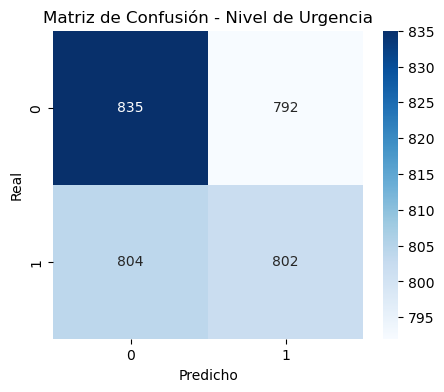

In [ ]:
'''
# Matriz de confusión visual
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Nivel de Urgencia")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()'''


PROBAR CON NUEVO COMENTARIO


In [ ]:
'''# Ejemplo de nuevo comentario
nuevo = pd.DataFrame({
    'Comentario': ["faltan médicos en el centro de salud"],
    'Zona rural': [0],
    'Acceso a internet': [1],
    'Atención previa del gobierno': [0]
})

prediccion = modelo_urgencia.predict(nuevo)[0]
print(f"🔮 Predicción del modelo: {prediccion}")'''

🔮 Predicción del modelo: No urgente


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# XGBoost
from xgboost import XGBClassifier

# Stopwords en español
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Palabras asociadas a urgencia
palabras_urgencia = ['falta', 'no hay', 'peligro', 'oscuro', 'médico', 'contaminación', 'robo']

df['Puntaje_urgencia'] = df['Comentario'].str.lower().apply(
    lambda x: sum(palabra in x for palabra in palabras_urgencia)
)

# Variables predictoras y objetivo
X = df[['Comentario', 'Zona rural', 'Acceso a internet', 'Atención previa del gobierno', 'Puntaje_urgencia']]
y = df['Nivel de urgencia']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [ ]:
# Stopwords en español
stopwords_es = stopwords.words('spanish')

# Preprocesamiento de texto + numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('texto', TfidfVectorizer(stop_words=stopwords_es, ngram_range=(1,2), max_df=0.9, min_df=2), 'Comentario'),
        ('numericas', 'passthrough', ['Zona rural', 'Acceso a internet', 'Atención previa del gobierno', 'Puntaje_urgencia'])
    ]
)

# Modelo XGBoost integrado en Pipeline
modelo_urgencia = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('clasificador', XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ))
])


In [ ]:
modelo_urgencia.fit(X_train, y_train)
print("✅ Modelo XGBoost entrenado correctamente.")


In [ ]:
# Predicciones
y_pred = modelo_urgencia.predict(X_test)

# Reporte detallado
print("\n📈 Reporte de Clasificación (XGBoost):\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión visual
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Nivel de Urgencia (XGBoost)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [ ]:
# Ejemplo práctico
nuevo_reporte = pd.DataFrame({
    'Comentario': ["las calles están muy oscuras y peligrosas"],
    'Zona rural': [1],
    'Acceso a internet': [0],
    'Atención previa del gobierno': [0],
    'Puntaje_urgencia': [2]
})

prediccion = modelo_urgencia.predict(nuevo_reporte)[0]
print(f"🔮 Predicción del modelo: {prediccion}")
